In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [177]:
dif_genes = pd.read_csv("../data/dif_genes2.csv")
LINE_COLORS = {
    "AX4": "#000000",
    "B1-": "#00B2FF",
    "C1-": "#A400D3",
    "rgB-": "#008528",
    "B1-rgB-": "#D9D800",
    "AX4L846F": "#ED1C24",
}
STRAINS = ["AX4", "B1-", "C1-", "rgB-", "B1-rgB-", "AX4L846F"]
FILE_NAMES = {
    "AX4": "AX4",
    "B1-": "B1",
    "C1-": "C1",
    "rgB-": "rgB",
    "B1-rgB-": "B1_rgB",
    "AX4L846F": "AX4L846F",
}
TIMES = [0, 4, 8, 12, 16, 20]

In [178]:
data = pd.read_csv(
    "/Users/lenatrnovec/FAKS/BIOLAB/RNAseq_dicty/mds_like_analysis/data/expression_data_average.csv"
)
p_values = {}
for strain in STRAINS[1:]:
    p_values[strain] = pd.read_csv(
        f"/Users/lenatrnovec/FAKS/BIOLAB/RNAseq_dicty/differential_expression/results/time_series/genes/DE_{FILE_NAMES[strain]}.csv"
    )

In [179]:
dif_genes_list = list(dif_genes["Gene_ID"])
dif_genes_symbols = list(dif_genes["Symbol"])

In [180]:
strain_tables = {}

In [181]:
for strain in STRAINS[1:]:
    strain_tables[strain] = dif_genes.copy()
    strain_tables[strain]["Regulation"] = np.nan
    strain_tables[strain]["P_value"] = np.nan

/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_8143/722920986.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Downregulated' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  strain_tables[strain].loc[
/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_8143/722920986.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Downregulated' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  strain_tables[strain].loc[
/var/folders/b0/d34rvffj6l18k2sl5mb16w440000gn/T/ipykernel_8143/722920986.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Upregulated' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  

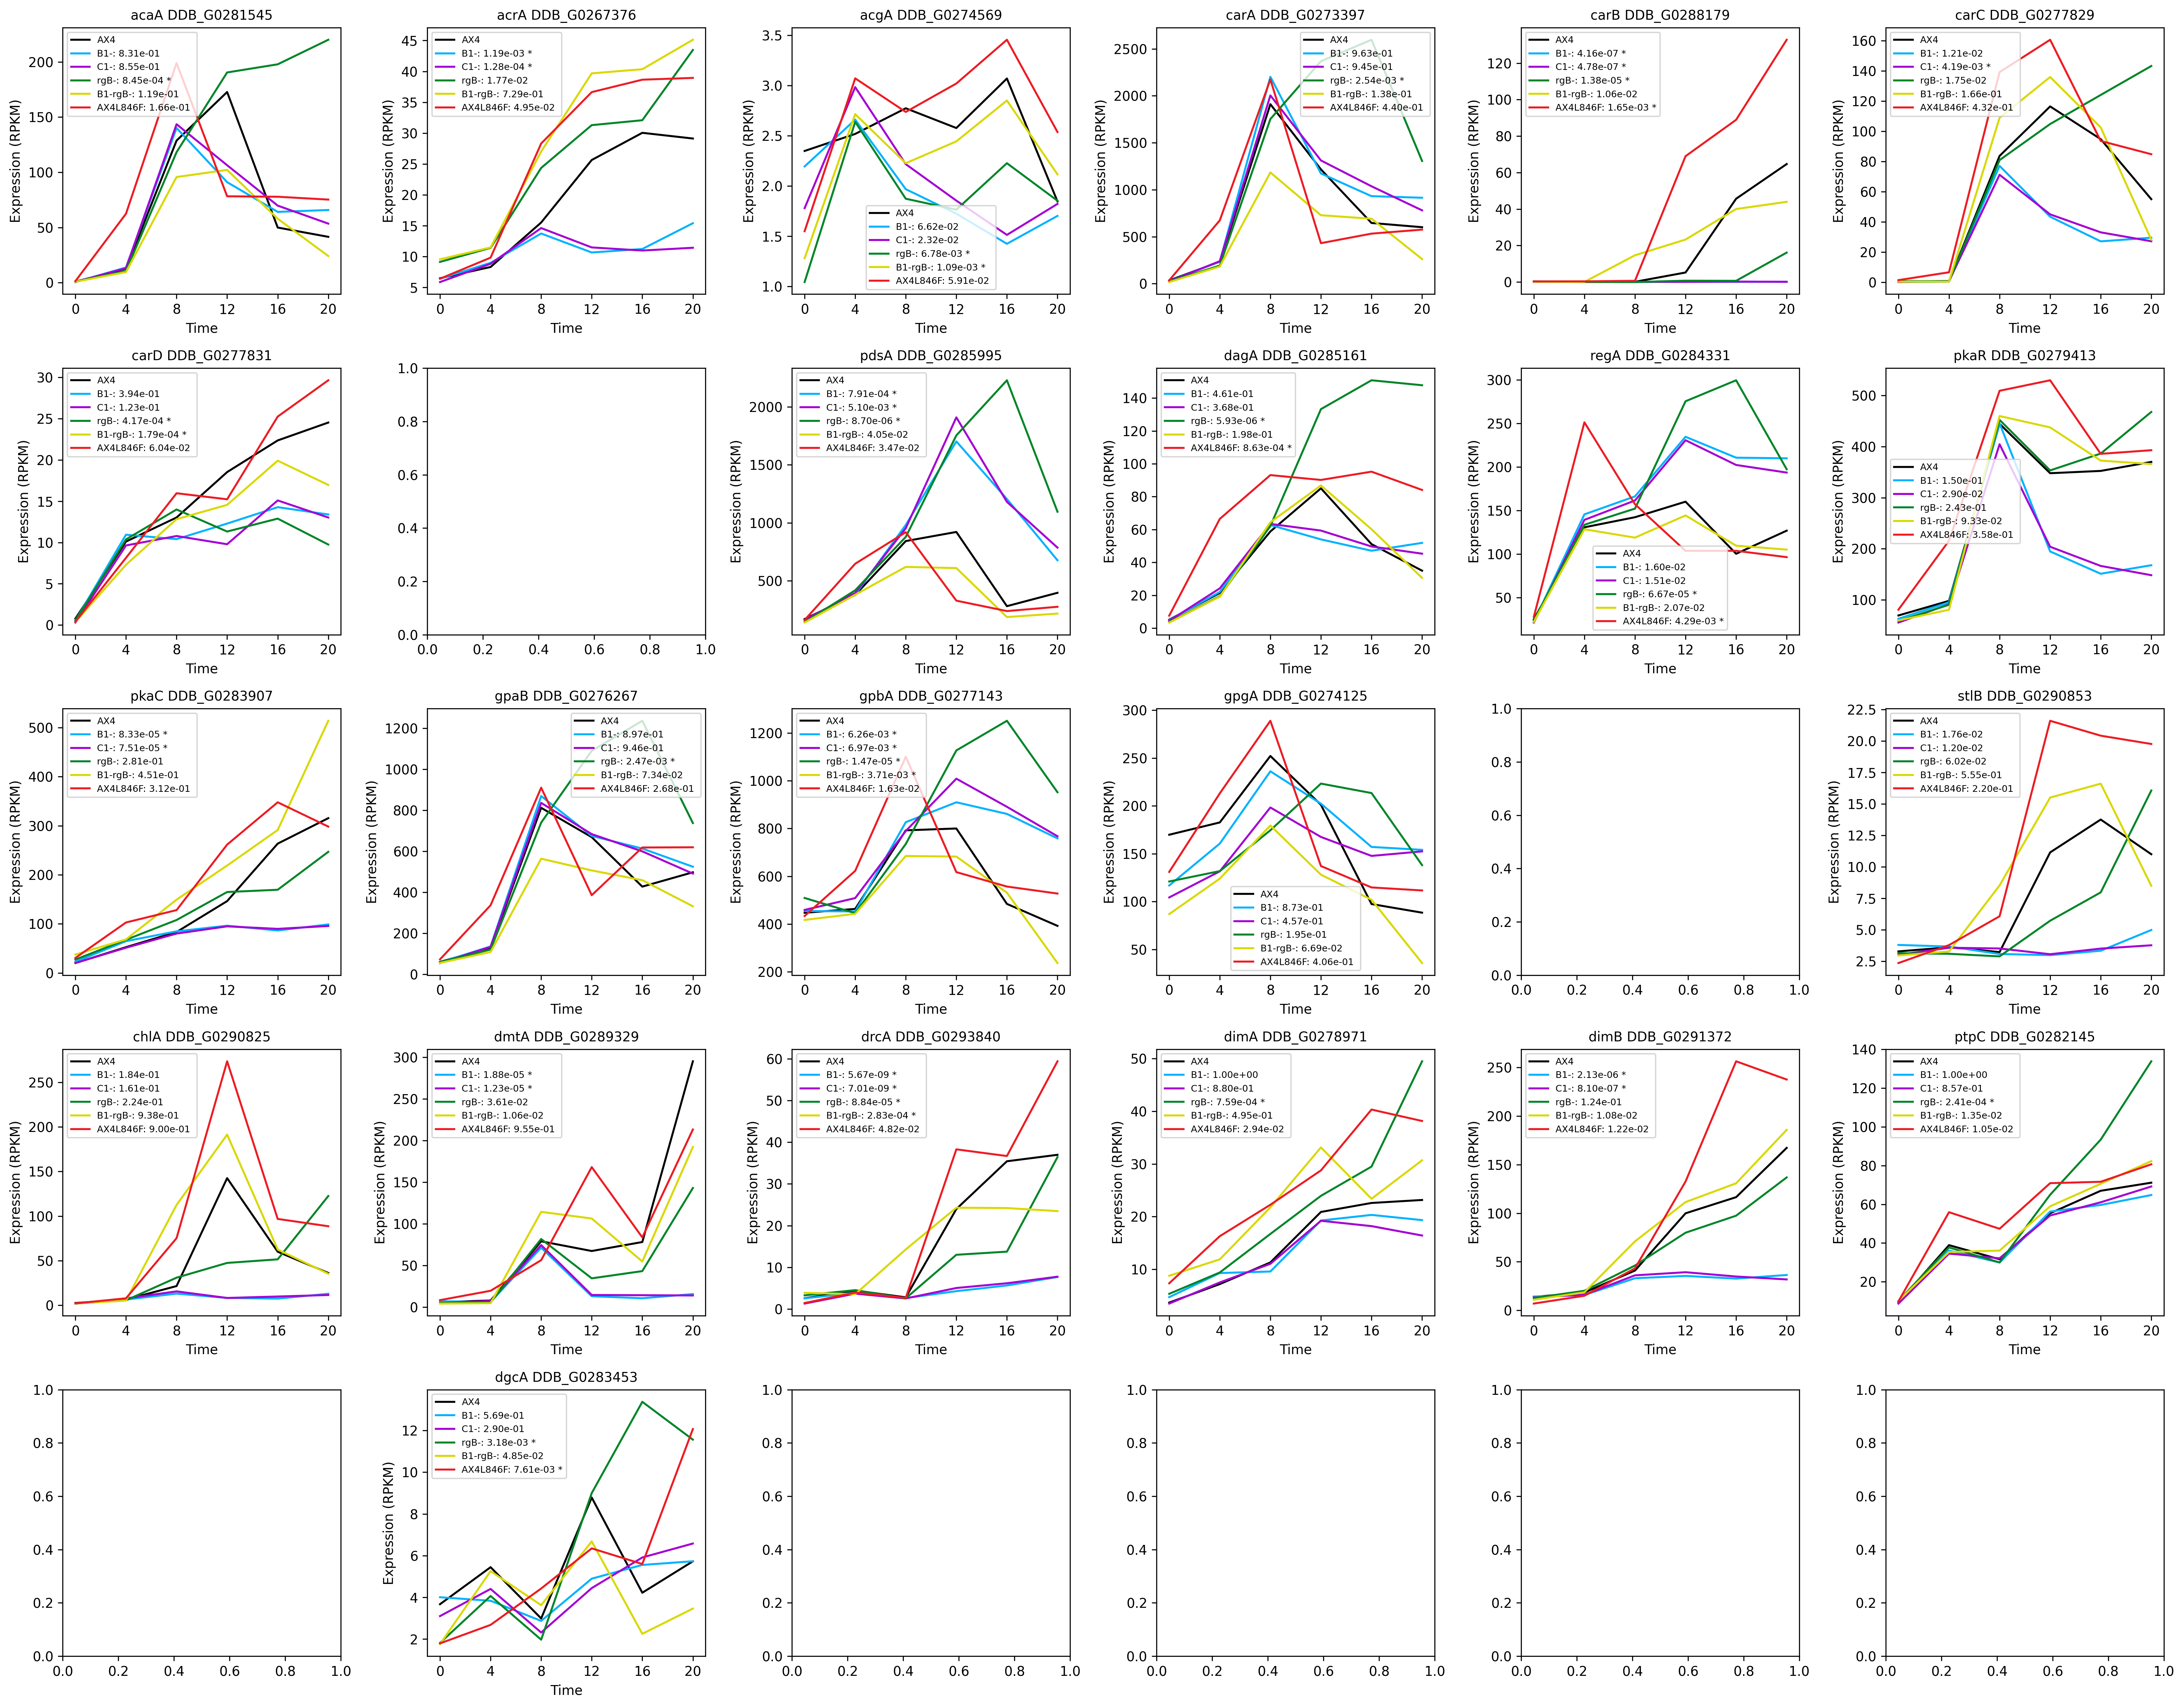

In [182]:
x_dim = 5
y_dim = 6
fig, axes = plt.subplots(x_dim, y_dim, figsize=(23, 18), dpi=300)
axes = axes.flatten()  # Flatten the 2D array to easily loop through

for i, gene in enumerate(dif_genes_list):
    if gene is np.nan:
        continue
    if i >= x_dim * y_dim:
        break  # Prevent index error if there are more genes than subplots

    ax = axes[i]
    for strain in STRAINS:
            
        values = data[data["Strain"] == strain]
        if strain != "AX4":
            row = p_values[strain][p_values[strain]["row_IDs"] == gene]
            p_value = row["adj.P.Val"].values[0]
            strain_tables[strain].loc[
                strain_tables[strain]["Gene_ID"] == gene, "P_value"
            ] = p_value
            strain_tables[strain].loc[
                strain_tables[strain]["Gene_ID"] == gene, "Regulation"
            ] = row["Regulation"].values[0]
            ax.plot(
                TIMES,
                values[gene].values,
                color=LINE_COLORS[strain],
                label=f"{strain}: {p_value:.2e} {'' if p_value > 0.01 else '*'}",
            )
        else:
            ax.plot(
                TIMES,
                values[gene].values,
                color=LINE_COLORS[strain],
                label=f"{strain}",
            )

    ax.set_title(f"{dif_genes_symbols[i]} {gene}", fontsize=10)
    ax.set_xlabel("Time")
    ax.set_xticks(TIMES)
    ax.set_ylabel("Expression (RPKM)")
    ax.legend(fontsize=7)

plt.tight_layout()
plt.savefig("dif_genes_expression.pdf", dpi=300)
plt.show()

In [152]:
# for strain in STRAINS[1:]:
#     #sort the table by p-value
#     #first sort by Group then by P_value
#     strain_tables[strain] = strain_tables[strain].sort_values(
#         by=["Regulation", "P_value"], ascending=[True, True]
#     )

In [153]:
for strain in STRAINS[1:]:
    strain_tables[strain].to_csv(f"{strain}_dif_genes.csv", index=False)